In [165]:
# The dataset which has been used to perform logistic regression is that of loan payments
# The dataset can be described as following:
# Loand_ID : loan id of the person who has taken a loan
# Loan_status : Has it been paidoff or not.
#Principal : the principal amount of loan
#terms : Number of terms for which the loan is repayable
#Effective_date : start date of the loan
#due_date : The date till which it has to be paid
#Paid_off_time : time taken to pay back the loan
#past_Due_days : the days by which the person has faulted in repaying the loan
#age : age of the person 
#education : education degree as bachelor, college and high school or below

In [166]:
#The logistic regression is being performed on the dataset to predict whether a male or female would have taken a loan based on 
# parameters like.

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [168]:
pay=pd.read_csv('payments.csv')

In [169]:
pay.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [170]:
pay.apply(lambda x: sum(x.isnull()), axis=0)
#There are missing values as we can see below in respective columns:

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [171]:
pay1=pay.copy()

In [172]:
pay1.dropna(inplace=True)
pay1.isnull().sum()
#Dropping NA values as they lead to inconsistency

Loan_ID           0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
paid_off_time     0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64

In [173]:
pay1.describe()


,Principal,terms,past_due_days,age
count,100.000000,100.000000,100.000000,100.000000
mean,957.000000,23.920000,9.160000,31.340000
std,91.292625,7.525955,12.543033,6.312118
min,500.000000,7.000000,1.000000,21.000000
25%,1000.000000,15.000000,2.000000,26.000000
50%,1000.000000,30.000000,3.000000,30.000000
75%,1000.000000,30.000000,12.000000,35.000000
max,1000.000000,30.000000,56.000000,49.000000


In [174]:
pay1.isnull().values.any().sum()

0

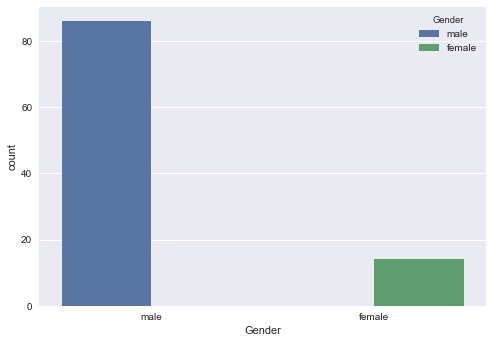

In [175]:
# Show value counts for a single categorical variable:
ax = sns.countplot(x="Gender", data=pay1, hue="Gender")
plt.show()
#The dataset is male skewed as the number of females taking loans is fairly less as compared to the number of males taken.

In [176]:
categorical_cols = ['education']
for c in categorical_cols:
    pay1[c] = pd.factorize(pay1[c])[0]
pay1.head(3)
#Categorising education to numeric field as it was in string

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
400,xqd20160401,COLLECTION_PAIDOFF,1000,30,9/9/2016,10/8/2016,10/10/2016 11:45,2.0,26,0,male
401,xqd20160402,COLLECTION_PAIDOFF,1000,15,9/9/2016,9/23/2016,9/27/2016 17:00,4.0,28,0,male
402,xqd20320403,COLLECTION_PAIDOFF,1000,30,9/9/2016,11/7/2016,11/20/2016 14:10,13.0,39,0,male


In [177]:
dummy_ranks = pd.get_dummies(pay1['education'], prefix='education')
dummy_ranks.head()
#dummification of education as they also seem significant in prediction of a male or a female has taken a loan based on their
# current education degree and future needs.

,education_0,education_1,education_2
400,1,0,0
401,1,0,0
402,1,0,0
403,0,1,0
404,0,0,1


In [178]:
keep = ['Principal', 'terms',
        'past_due_days','age']
pay1_dummy = pay1[keep].join(dummy_ranks.ix[:, 'education_0':])
pay1_dummy.head()

C:\Users\chels\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


,Principal,terms,past_due_days,age,education_0,education_1,education_2
400,1000,30,2.0,26,1,0,0
401,1000,15,4.0,28,1,0,0
402,1000,30,13.0,39,1,0,0
403,1000,15,5.0,29,0,1,0
404,800,15,3.0,33,0,0,1


In [179]:
pay1['Gender']=pd.factorize(pay1['Gender'])[0]
#Making male and female as boolean values for male=0 and female=1

In [180]:
pay.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

In [181]:
pred=['Principal', 'terms',
        'past_due_days','age','education_0','education_1','education_2']
pred

['Principal',
 'terms',
 'past_due_days',
 'age',
 'education_0',
 'education_1',
 'education_2']

In [182]:
target=['Gender']
target

['Gender']

In [183]:
#setting predictor fields
x = pay1_dummy[pred]
print(x.shape,'X')
#setting target
y = pay1[target]
print(y.shape,'Y')

(100, 7) X
(100, 1) Y


In [184]:
type(x)
type(y)

pandas.core.frame.DataFrame

In [185]:
# setting Logistic regression classifier
# scikit-learn includes the intercept.

lr = LogisticRegression(C=1e9)

#dividing data to have a training and a testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .2, random_state=0)

# Logistic regression metrics
LRm = lr.fit(x_train, y_train)



LRm.predict_proba(x_test)  # The returned estimates for all classes are ordered by the label of classes.

C:\Users\chels\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 0.81783501,  0.18216499],
       [ 0.88037407,  0.11962593],
       [ 0.82057979,  0.17942021],
       [ 0.84762217,  0.15237783],
       [ 0.91672978,  0.08327022],
       [ 0.91071058,  0.08928942],
       [ 0.91336871,  0.08663129],
       [ 0.82734183,  0.17265817],
       [ 0.78960276,  0.21039724],
       [ 0.84673154,  0.15326846],
       [ 0.86430091,  0.13569909],
       [ 0.97330034,  0.02669966],
       [ 0.97036277,  0.02963723],
       [ 0.83310726,  0.16689274],
       [ 0.93947572,  0.06052428],
       [ 0.93801197,  0.06198803],
       [ 0.84582653,  0.15417347],
       [ 0.84633025,  0.15366975],
       [ 0.86097853,  0.13902147],
       [ 0.96198323,  0.03801677]])

In [186]:
LRm.coef_

array([[-0.00430789,  0.03078563, -0.03711651,  0.07114423,  0.13358482,
        -1.05132902,  0.35609412]])

In [187]:
LRm.intercept_

array([-0.56165008])

In [188]:
LRm.decision_function(x_test) # Predict confidence scores for samples.

array([-1.5017478 , -1.9959773 , -1.52028059, -1.71607183, -2.39872171,
       -2.32234217, -2.35547854, -1.56690421, -1.32253261, -1.70919266,
       -1.85148112, -3.59604169, -3.48863879, -1.60781109, -2.74227744,
       -2.71682136, -1.70223587, -1.70610387, -1.82344122, -3.2309697 ])

In [189]:
LRm.predict(x_test)



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [190]:
y_pred = LRm.predict(x_test)
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y_test, y_pred))

Accuracy score using Logistic regression is 0.9


In [191]:
k=10 #10 fold cross validation
acc=[]
for i in range(k):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=i)
    # Logistic regression metrics
    LRm = lr.fit(x_train, y_train)
    a=metrics.accuracy_score(y_test, LRm.predict(x_test))
    acc.append(a)
    
print (acc)
print (np.mean(acc))
print (np.std(acc))

[0.90000000000000002, 0.84999999999999998, 0.75, 0.84999999999999998, 0.69999999999999996, 0.80000000000000004, 0.90000000000000002, 0.94999999999999996, 0.84999999999999998, 0.84999999999999998]
0.84
0.07


C:\Users\chels\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [198]:
knn=KNeighborsClassifier(n_neighbors=8)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4, random_state=42)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


C:\Users\chels\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [193]:
#confusion matrix
confusion_matrix(y_test, y_pred) 
#The confusion matrix shows that therer are 36 true positives for males on either axes and 4 for females versus males axes which
# is in sync with the plot of females and males shown before.

array([[36,  0],
       [ 4,  0]])

In [194]:
#Classification Report
target_names = ['Male 0', 'Female 1']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

     Male 0       0.90      1.00      0.95        36
   Female 1       0.00      0.00      0.00         4

avg / total       0.81      0.90      0.85        40



C:\Users\chels\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [195]:
y_pred_prob=lr.predict_proba(x_test)[:,1]

In [196]:
fpr, tpr, threshold = roc_curve(y_test,y_pred_prob)


In [197]:
print(fpr, tpr, threshold)

[ 0.          0.02777778  0.02777778  0.16666667  0.16666667  0.25        0.25
  1.        ] [ 0.25  0.25  0.5   0.5   0.75  0.75  1.    1.  ] [  3.76496420e-01   3.38700377e-01   2.97525511e-01   2.55129308e-01
   2.50495333e-01   2.24334231e-01   2.21122081e-01   1.56988025e-07]


In [ ]:
# The above show the false positive rate, true positive rate and the threshold after which the roc under the curve changes.